In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.nonparametric.smoothers_lowess import lowess
from AB_testing import *
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 10, 6

# Initializing two Variant objects (A and B)
Here we say that our prior beliefs for the conversion rate of variants A and B is modeled by $Beta(4, 100)$

We also specify that each % increase in the conversion rate is worth $10,000 to our business. This is just an example. For actual use cases, the prior specification and the conversion rate value will be informed by business considerations and relevant data.



In [28]:
# Parameters for our beta distribution prior
alpha = 4
beta = 100
conversion_rate_value = 10000

A = Variant(alpha, beta, conversion_rate_value)
B = Variant(alpha, beta, conversion_rate_value)

## Plotting our weakly informative prior
The distribution looks purple because it is a red distribution overlapping with a blue one.

(0.0, 12.0)

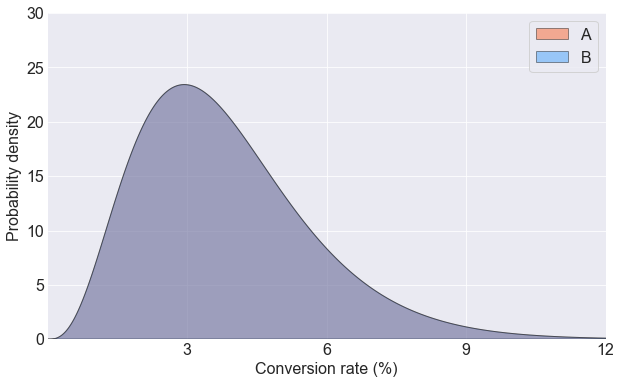

In [29]:
A.plot_conversion_dist('orangered')
B.plot_conversion_dist('dodgerblue')
plt.legend(['A', 'B'], frameon=True)
plt.ylim(0,30)
plt.xticks(np.linspace(3,12,4))
plt.xlim(0,12)

## Plotting it as a monetary lottery

The value of the current decision situation is 38461.53846153846


(0.0, 120000.0)

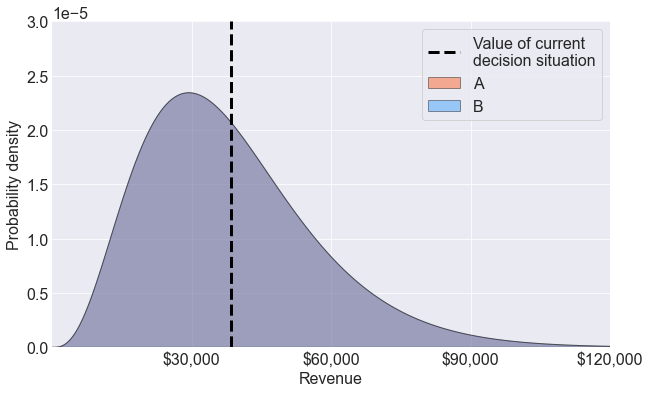

In [30]:
current_decision_value = np.max((A.expected_value, B.expected_value))
print(f"The value of the current decision situation is {current_decision_value}")

plt.axvline(current_decision_value, linestyle='--', color='k', linewidth=3)
A.plot_value_dist('orangered')
B.plot_value_dist('dodgerblue')
plt.legend(['Value of current \ndecision situation', 'A', 'B'], frameon=True)
plt.ylim(0,0.00003)
plt.xticks(np.linspace(30000,120000, 4))
plt.xlim(0, 120000)

# Simulating an A/B test

In [31]:
# setting the seed to make the result repeatable
np.random.seed(3)
updated_value = simulate_test(A, B, test_sample_size=100, verbose=True)

Variant A: 11 conversions out of 100
Variant B: 2 conversions out of 100
A appears to be the better option


In [32]:
# Updating beliefs based on the test results
A.update_beliefs(test_sample_size=100, num_conversions=11)
B.update_beliefs(test_sample_size=100, num_conversions=2)

(0.0, 12.0)

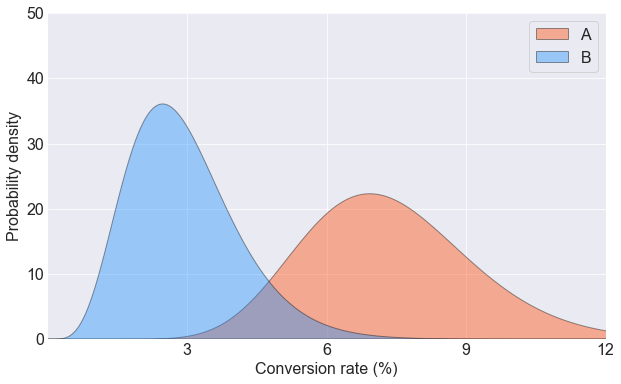

In [33]:
A.plot_conversion_dist('orangered')
B.plot_conversion_dist('dodgerblue')
plt.ylim(0,50)
plt.legend(['A', 'B'], frameon=True)
plt.xticks(np.linspace(3,12,4))
plt.xlim(0,12)

The value of the current decision situation is 73529.41176470589


(0.0, 120000.0)

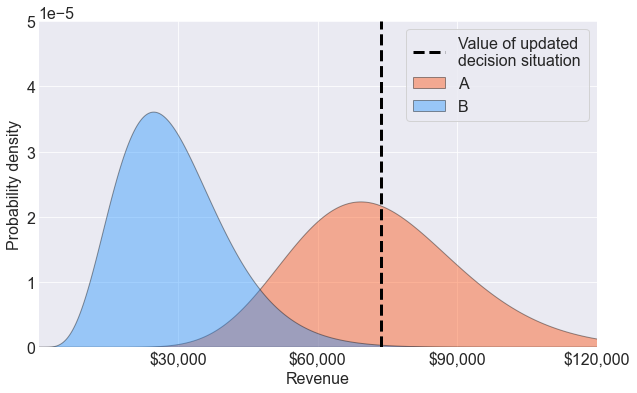

In [8]:
current_decision_value = np.max((A.expected_value, B.expected_value))
print(f"The value of the current decision situation is {current_decision_value}")
plt.axvline(current_decision_value, linestyle='--', color='k', linewidth=3)

A.plot_value_dist('orangered')
B.plot_value_dist('dodgerblue')
plt.legend(['Value of updated \ndecision situation', 'A', 'B'], frameon=True)
plt.ylim(0,0.00005)
plt.xticks(np.linspace(30000,120000, 4))
plt.xlim(0, 120000)

## Reset objects and simulate another test

In [9]:
np.random.seed(30)
A = Variant(alpha, beta, conversion_rate_value)
B = Variant(alpha, beta, conversion_rate_value)
updated_value = simulate_test(A, B, test_sample_size=100, verbose=True, update_beliefs=True)

Variant A: 4 conversions out of 100
Variant B: 5 conversions out of 100
B appears to be the better option


The value of the current decision situation is 44117.64705882353


(0.0, 120000.0)

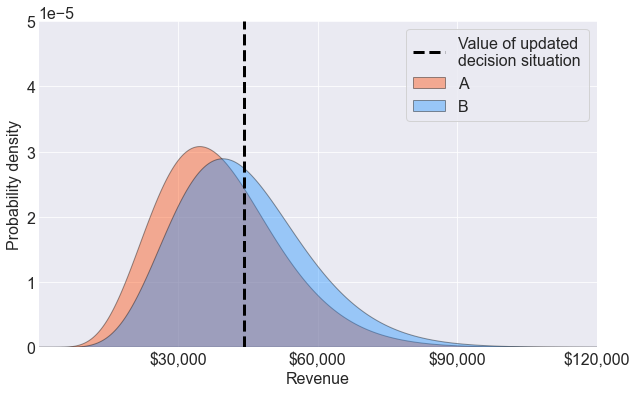

In [10]:
current_decision_value = np.max((A.expected_value, B.expected_value))
print(f"The value of the current decision situation is {current_decision_value}")
plt.axvline(current_decision_value, linestyle='--', color='k', linewidth=3)

A.plot_value_dist('orangered')
B.plot_value_dist('dodgerblue')
plt.legend(['Value of updated \ndecision situation', 'A', 'B'], frameon=True)
plt.ylim(0,0.00005)
plt.xticks(np.linspace(30000,120000, 4))
plt.xlim(0, 120000)

# Plot the distribution of decision situation values that result from simulated A/B tests

In [11]:
np.random.seed(0)
A = Variant(alpha, beta, conversion_rate_value)
B = Variant(alpha, beta, conversion_rate_value)
value_array = monte_carlo(A, B, test_sample_size=100)

100%|██████████| 10000/10000 [00:14<00:00, 701.04it/s]


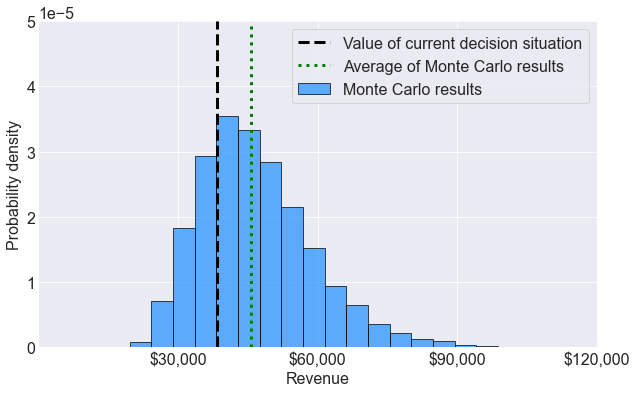

In [12]:
plt.hist(value_array, density=True, bins=20, edgecolor='k', color='dodgerblue', alpha=0.7)
plt.xticks(np.linspace(50000,150000, 3))
plt.axvline(A.expected_value, linestyle='--', color='k', linewidth=3)
plt.axvline(np.mean(value_array), linestyle='dotted', color='green', linewidth=3)
plt.ylim(0,0.00005)
plt.xticks(np.linspace(30000,120000, 4))
plt.xlim(0, 120000)
plt.xlabel('Revenue')
plt.ylabel("Probability density")
plt.legend(['Value of current decision situation', 'Average of Monte Carlo results','Monte Carlo results'], frameon=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

# Compute value of information starting from the original prior

In [13]:
np.random.seed(0)
A = Variant(alpha, beta, conversion_rate_value)
B = Variant(alpha, beta, conversion_rate_value)
voi = calc_voi(A, B, test_sample_size=100)
print(voi)

100%|██████████| 10000/10000 [00:13<00:00, 731.32it/s]

7294.343891402721


# Value of information as a function of sample size, original prior

In [14]:
np.random.seed(46)
A = Variant(alpha, beta, conversion_rate_value)
B = Variant(alpha, beta, conversion_rate_value)

In [15]:
def voi_vs_sample_size(sample_sizes, A, B):
    voi_list = []
    for size in sample_sizes:
        voi_list.append(calc_voi(A, B, test_sample_size=size))
    return voi_list

In [16]:
sample_sizes = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500]
cost = 25*np.array(sample_sizes)

In [17]:
voi_list_original = voi_vs_sample_size(sample_sizes, A, B)
voc_original = calc_voc(A, B)

100%|██████████| 10000/10000 [00:13<00:00, 737.53it/s]


In [18]:
def make_plot(voi_list, sample_sizes, voc, cost):
    smooth_voi = lowess(voi_list, sample_sizes, return_sorted=False, frac=.25)
    
    fig, ax = plt.subplots()
    raw_points = ax.scatter(sample_sizes, voi_list, color='k', alpha=0.5)
    voc_line = ax.axhline(voc, color='k', linestyle='--')
    smooth_voi_line = ax.plot(sample_sizes, smooth_voi, color='green', linewidth=3)[0]
    cost_line = ax.plot(sample_sizes, cost, color='orangered', linewidth=3)[0]
    profit_region = ax.fill_between(sample_sizes, cost, smooth_voi, color='green', where=smooth_voi >= cost, alpha=0.2, interpolate=True)
    loss_region = ax.fill_between(sample_sizes, cost, smooth_voi, color='red', where=cost > smooth_voi, alpha=0.2, interpolate=True)
    ax.set_xlabel("Number of participants")
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax.legend([raw_points, smooth_voi_line, voc_line, cost_line, profit_region, loss_region],
               ["Raw MC results", "Smooth VOI", "Value of clairvoyance", "Cost", "Profit", "Loss"], 
               loc='upper left', frameon=True, ncol=2)
    ax.set_xlim(0,np.max(sample_sizes))
    ax.set_ylim(0, 15000)

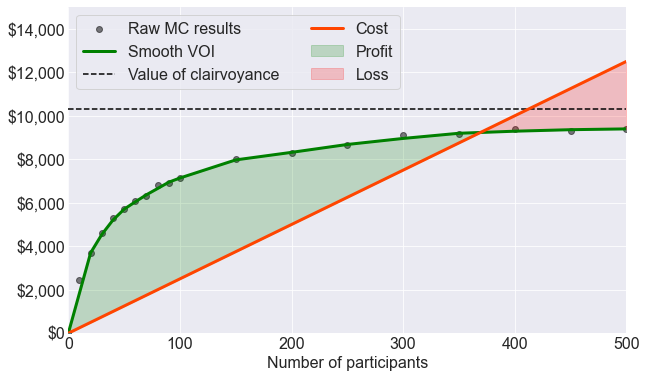

In [19]:
make_plot(voi_list_original, sample_sizes, voc_original, cost)

# Value of information as a function of sample size, "informed" prior

In [37]:
np.random.seed(113)
A = Variant(alpha, beta, conversion_rate_value)
B = Variant(alpha, beta, conversion_rate_value)
updated_value = simulate_test(A, B, test_sample_size=30, verbose=True, update_beliefs=True)

Variant A: 2 conversions out of 30
Variant B: 4 conversions out of 30
B appears to be the better option


(0.0, 5e-05)

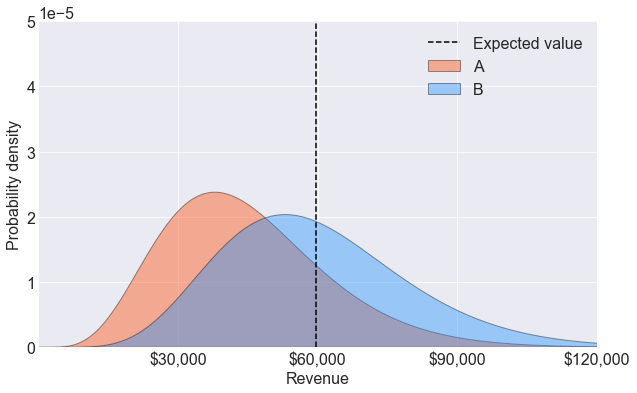

In [38]:
plt.axvline(updated_value, linestyle='--', color='k')
A.plot_value_dist('orangered')
B.plot_value_dist('dodgerblue')
plt.legend(['Expected value', 'A', 'B'])
plt.xticks(np.linspace(30000,120000, 4))
plt.xlim(0, 120000)
plt.ylim(0,0.00005)

In [22]:
voi_list_informed = voi_vs_sample_size(sample_sizes, A, B)
voc_informed = calc_voc(A, B)

100%|██████████| 10000/10000 [00:13<00:00, 724.90it/s]


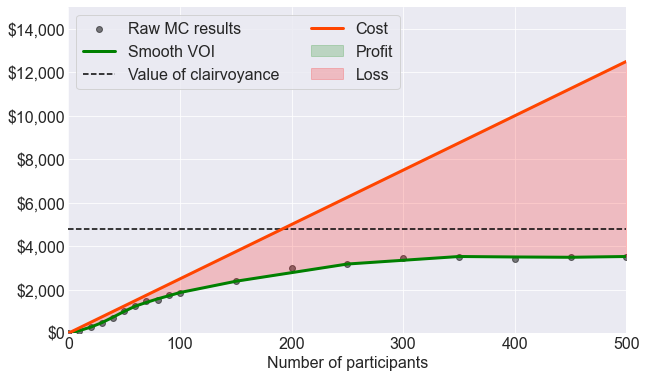

In [23]:
make_plot(voi_list_informed, sample_sizes, voc_informed, cost)